# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [ ]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [ ]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

In [ ]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

In [ ]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

In [ ]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

In [ ]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [ ]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## Check the Version of TensorFlow and Access to GPU

This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

## Train Agent on Pendulum Task
Use Pendulum task from OpenAI gym.

In [1]:
import matplotlib.pyplot as plt

# you must include '%matplotlib notebook' for this to work
##%matplotlib notebook

#pendulum values
#time_limit = 100
#y1_lower = -50
#y1_upper = 0
#y2_lower = 0
#y2_upper = 20

# quadcopter values
time_limit = 2
y1_lower = -100
y1_upper = 100
y2_lower = 0
y2_upper = 20

# generate plot function
def plt_dynamic(fig, sub1, sub2, x, y1, y2, color_y1='g', color_y2='b'):
   sub1.plot(x, y1, color_y1)
   sub2.plot(x, y2, color_y2)
   fig.canvas.draw()

def plt_clear(fig):
    fig.clear()

def plt_init():
    # create plots
    fig, sub1= plt.subplots(1,1)
    sub2 = sub1.twinx()

    # set plot boundaries
    sub1.set_xlim(0, time_limit) # this is typically time
    sub1.set_ylim(y1_lower, y1_upper) # limits to your y1
    sub2.set_xlim(0, time_limit) # time, again
    sub2.set_ylim(y2_lower, y2_upper) # limits to your y2

    # set labels and colors for the axes
    sub1.set_xlabel('time (s)', color='k') 
    sub1.set_ylabel('y1-axis label', color='g')
    sub1.tick_params(axis='x', colors='k')
    sub1.tick_params(axis='y', colors="g")

    sub2.set_ylabel('y2-axis label', color='b') 
    sub2.tick_params(axis='y', colors='b')
    
    return fig, sub1, sub2
    

In [ ]:
# you must include '%matplotlib notebook' for this to work
%matplotlib notebook

import gym
import sys
from agents.agent import DDPG
from pendulum_task import PendulumTask

num_episodes = 1000
task = PendulumTask()
agent = DDPG(task) 

display_freq = 50
display_step_freq = 10

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    
    
    display_graph = i_episode % display_freq == 0
    if display_graph:
        # prior to the start of each episode, clear the datapoints
        x, y1, y2 = [], [], []    
        fig, sub1, sub2 = plt_init()

    step = 0
    total_reward = 0
    
    while True:
        step += 1
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_reward += reward
        # within the episode loop
        if display_graph:
            x.append(step) # time
            y1.append(reward) # y-axis 1 values
            y2.append(next_state[0]) # y-axis 2 values
            
            if step % display_step_freq == 0:
                plt_dynamic(fig, sub1, sub2, x, y1, y2)
            
            #print(task.current_steps)
            #print(f'Episode number {i_episode}')
            #print(f'action {action}, reward {reward}, next_state {next_state}, done {done}')
        #    print(f'Plot values - time {task.sim.time}, reward {reward}, z {task.sim.pose[2]}')
        #if done:
        #    print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
        #        i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
        #    break
        if done:
            print("\rEpisode = {:4d}, total reward = {:7.3f}".format(
                i_episode, total_reward))  # [debug]
        #    if (episode % display_freq == 0) and (display_graph == True):
        #               plt_dynamic(x, y1, y2)
            break

    #if display_graph:  
    #    plt_clear(fig)
    #sys.stdout.flush()

In [ ]:
init_pose = [0., 0., 10., 0., 0., 0.]
inital_velocity = [0., 0., 0.]
init_angle_velocities = [0., 0., 0.]

In [ ]:
import matplotlib as plt

# you must include '%matplotlib notebook' for this to work
%matplotlib notebook

time_limit = 1
y1_lower = -10
y1_upper = 10
y2_lower = 0
y2_upper = 20

# generate plot function
def plt_dynamic(x, y1, y2, color_y1='g', color_y2='b'):
   sub1.plot(x, y1, color_y1)
   sub2.plot(x, y2, color_y2)
   fig.canvas.draw()

# create plots
fig, sub1= plt.subplots(1,1)
sub2 = sub1.twinx()

# set plot boundaries
sub1.set_xlim(0, time_limit) # this is typically time
sub1.set_ylim(y1_lower, y1_upper) # limits to your y1
sub2.set_xlim(0, time_limit) # time, again
sub2.set_ylim(y2_lower, y2_upper) # limits to your y2

# set labels and colors for the axes
sub1.set_xlabel('time (s)', color='k') 
sub1.set_ylabel('y1-axis label', color='g')
sub1.tick_params(axis='x', colors='k')
sub1.tick_params(axis='y', colors="g")

sub2.set_ylabel('y2-axis label', color='b') 
sub2.tick_params(axis='y', colors='b')

In [ ]:
x, y1, y2 = [], [], [] 

for i in range(100):
    x.append(i)
    y1.append(i)
    y2.append(2 * i)
    plt_dynamic(x, y1, y2)

Using TensorFlow backend.


Episode =    1, total reward = -2895.627
Episode =    2, total reward = -2779.289
Episode =    3, total reward = -2787.528
Episode =    4, total reward = -2633.664
Episode =    5, total reward = -2790.526
Episode =    6, total reward = -2756.299
Episode =    7, total reward = -2714.919
Episode =    8, total reward = -2788.564
Episode =    9, total reward = -2695.284
Episode =   10, total reward = -2712.245
Episode =   11, total reward = -2688.443
Episode =   12, total reward = -2649.389
Episode =   13, total reward = -2720.406
Episode =   14, total reward = -2757.599
Episode =   15, total reward = -2702.042
Episode =   16, total reward = -2806.336
Episode =   17, total reward = -2701.842
Episode =   18, total reward = -2699.058
Episode =   19, total reward = -2554.183


<IPython.core.display.Javascript object>


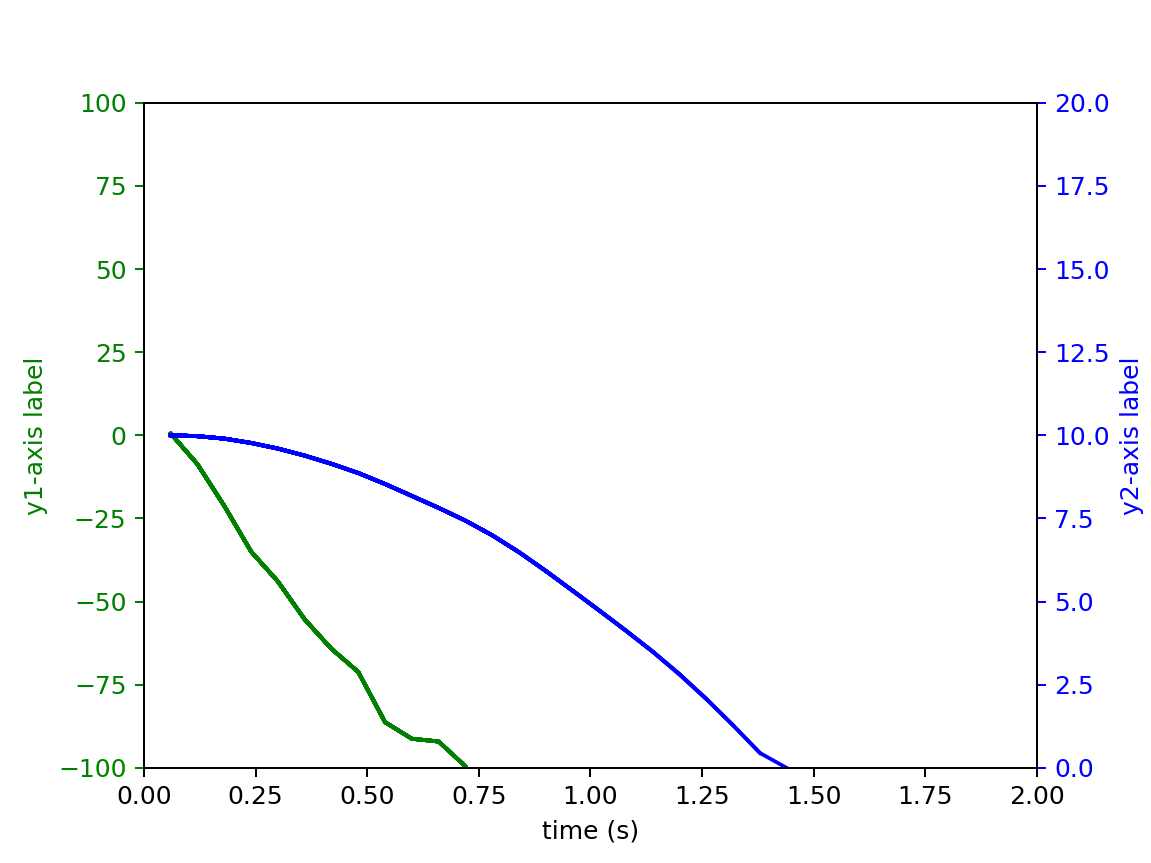

Episode =   20, total reward = -2682.079
Episode =   21, total reward = -2673.995
Episode =   22, total reward = -2791.364
Episode =   23, total reward = -2710.851
Episode =   24, total reward = -2705.754
Episode =   25, total reward = -2649.559
Episode =   26, total reward = -2694.753
Episode =   27, total reward = -2621.929
Episode =   28, total reward = -2699.426
Episode =   29, total reward = -2664.968
Episode =   30, total reward = -2693.537
Episode =   31, total reward = -2633.697
Episode =   32, total reward = -2672.474
Episode =   33, total reward = -2771.066
Episode =   34, total reward = -2748.921
Episode =   35, total reward = -2745.644
Episode =   36, total reward = -2650.148
Episode =   37, total reward = -2746.291
Episode =   38, total reward = -2606.597
Episode =   39, total reward = -2566.849


<IPython.core.display.Javascript object>


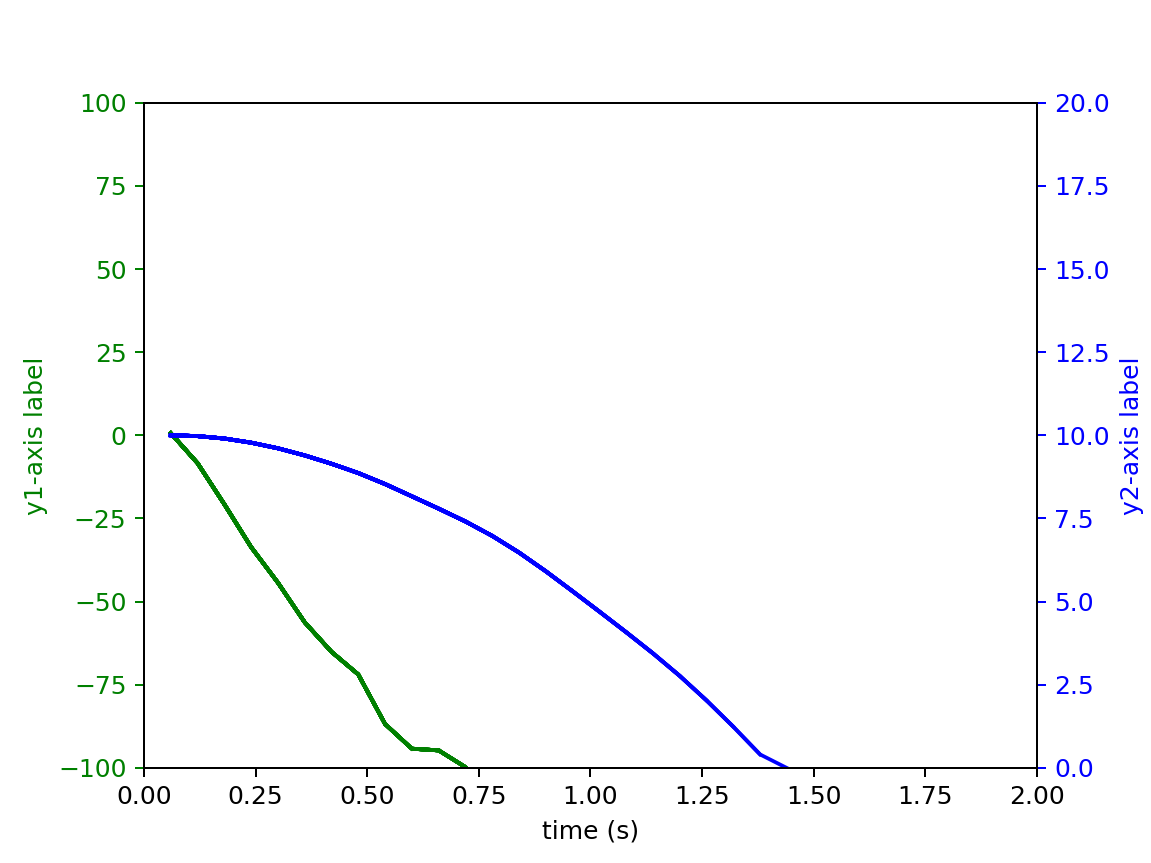

Episode =   40, total reward = -2700.133
Episode =   41, total reward = -2750.636
Episode =   42, total reward = -2604.745
Episode =   43, total reward = -2693.878
Episode =   44, total reward = -2696.314
Episode =   45, total reward = -2626.310
Episode =   46, total reward = -2745.884
Episode =   47, total reward = -2726.492
Episode =   48, total reward = -2562.713
Episode =   49, total reward = -2664.848
Episode =   50, total reward = -2800.537
Episode =   51, total reward = -2643.526
Episode =   52, total reward = -2630.006
Episode =   53, total reward = -2721.174
Episode =   54, total reward = -2757.086
Episode =   55, total reward = -2732.241
Episode =   56, total reward = -2664.771
Episode =   57, total reward = -2760.913
Episode =   58, total reward = -2609.170
Episode =   59, total reward = -2688.649


<IPython.core.display.Javascript object>


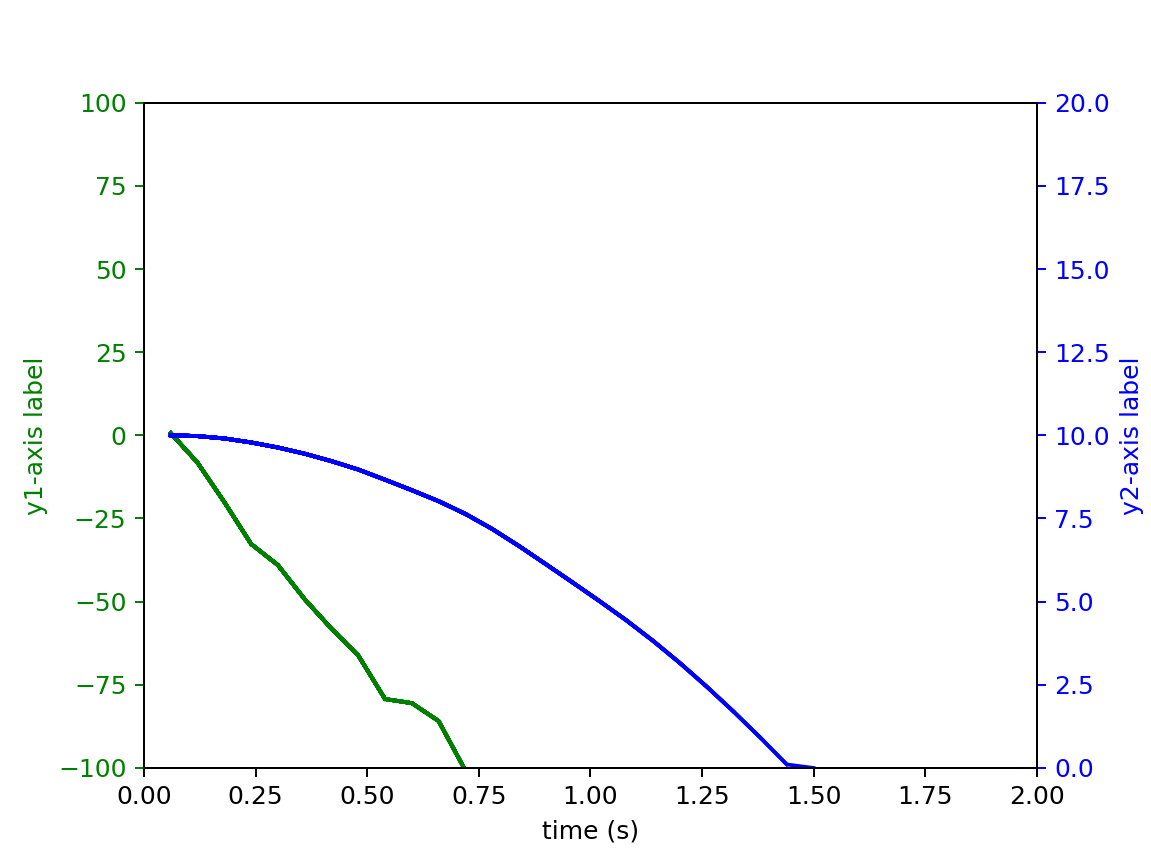

Episode =   60, total reward = -2785.024
Episode =   61, total reward = -2611.946
Episode =   62, total reward = -2779.105
Episode =   63, total reward = -3805.009
Episode =   64, total reward = -3416.454
Episode =   65, total reward = -2755.975
Episode =   66, total reward = -3079.247
Episode =   67, total reward = -2993.685
Episode =   68, total reward = -2270.989
Episode =   69, total reward = -2597.451
Episode =   70, total reward = -2067.937
Episode =   71, total reward = -2528.662
Episode =   72, total reward = -2162.165
Episode =   73, total reward = -3901.560
Episode =   74, total reward = -1697.199
Episode =   75, total reward = -1740.795
Episode =   76, total reward = -2441.848
Episode =   77, total reward = -3058.912
Episode =   78, total reward = -2860.100
Episode =   79, total reward = -3031.316


<IPython.core.display.Javascript object>


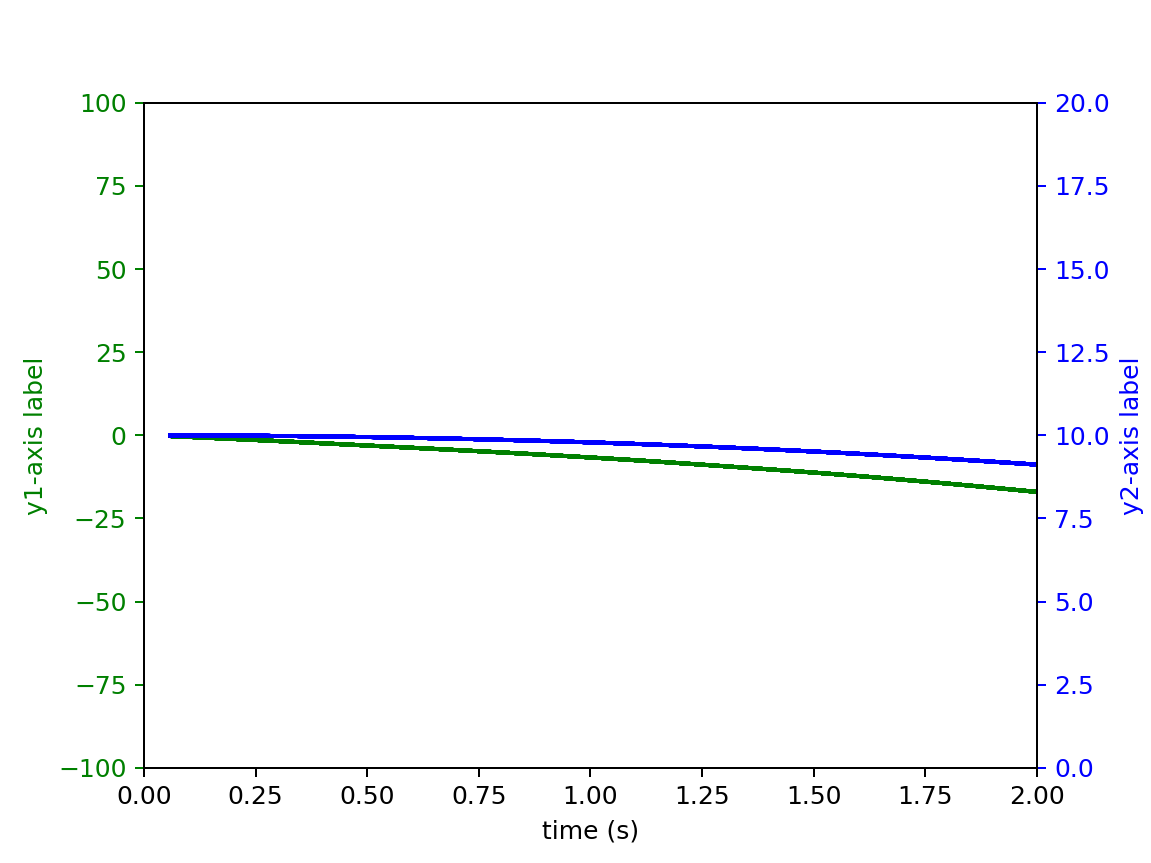

Episode =   80, total reward = -2856.409
Episode =   81, total reward = -2903.618
Episode =   82, total reward = -3150.278
Episode =   83, total reward = -2018.111
Episode =   84, total reward = -3379.924
Episode =   85, total reward = -2987.032
Episode =   86, total reward = -3104.584
Episode =   87, total reward = -2128.868
Episode =   88, total reward = -2985.326
Episode =   89, total reward = -3222.048
Episode =   90, total reward = -3123.615
Episode =   91, total reward = -2185.246
Episode =   92, total reward = -2927.087
Episode =   93, total reward = -3050.602
Episode =   94, total reward = -2194.429
Episode =   95, total reward = -1884.796
Episode =   96, total reward = -2537.308
Episode =   97, total reward = -3005.249
Episode =   98, total reward = -3553.523
Episode =   99, total reward = -1644.989


<IPython.core.display.Javascript object>


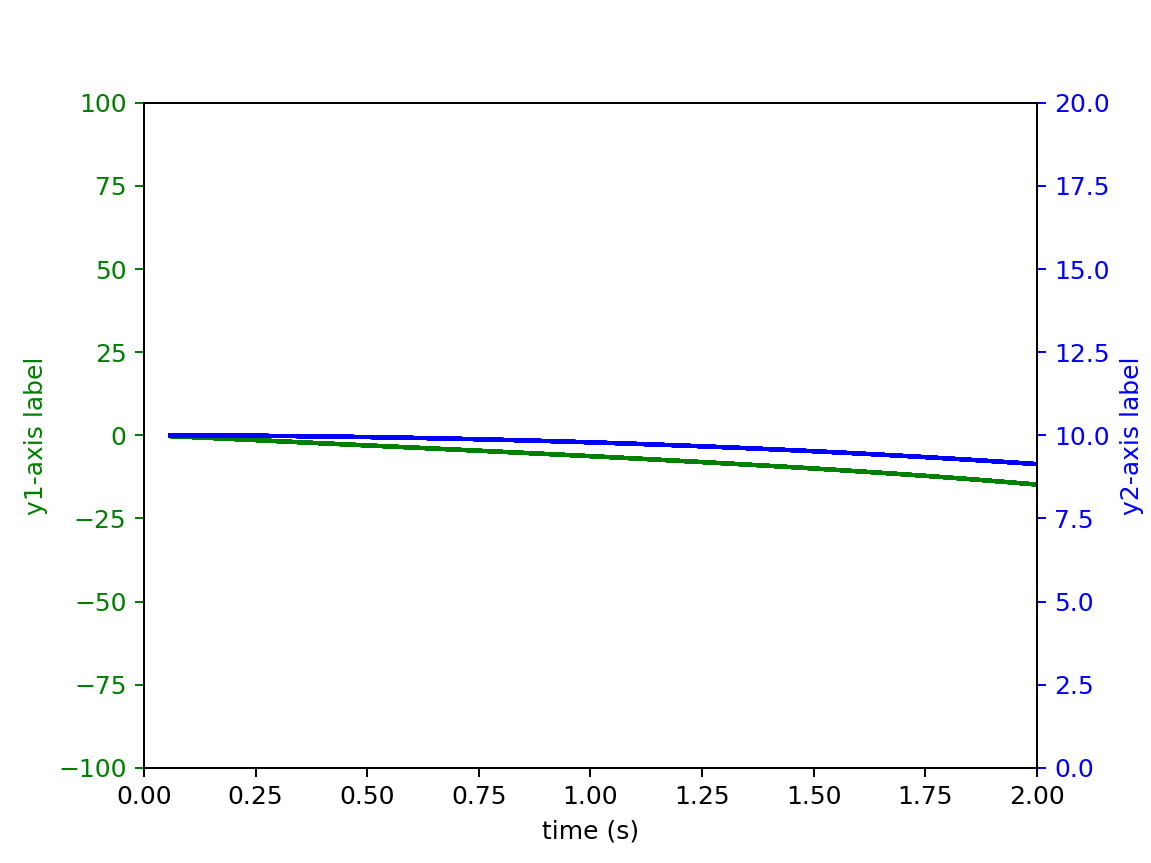

Episode =  100, total reward = -3278.421
Episode =  101, total reward = -2181.628
Episode =  102, total reward = -3973.954
Episode =  103, total reward = -2020.828
Episode =  104, total reward = -3126.705
Episode =  105, total reward = -3457.367
Episode =  106, total reward = -3042.403
Episode =  107, total reward = -3182.352
Episode =  108, total reward = -3872.510
Episode =  109, total reward = -2570.156
Episode =  110, total reward = -3033.726
Episode =  111, total reward = -2000.067
Episode =  112, total reward = -2440.984
Episode =  113, total reward = -3715.866
Episode =  114, total reward = -3395.828
Episode =  115, total reward = -3934.109
Episode =  116, total reward = -3738.927
Episode =  117, total reward = -2935.038
Episode =  118, total reward = -2408.226
Episode =  119, total reward = -2965.929


<IPython.core.display.Javascript object>


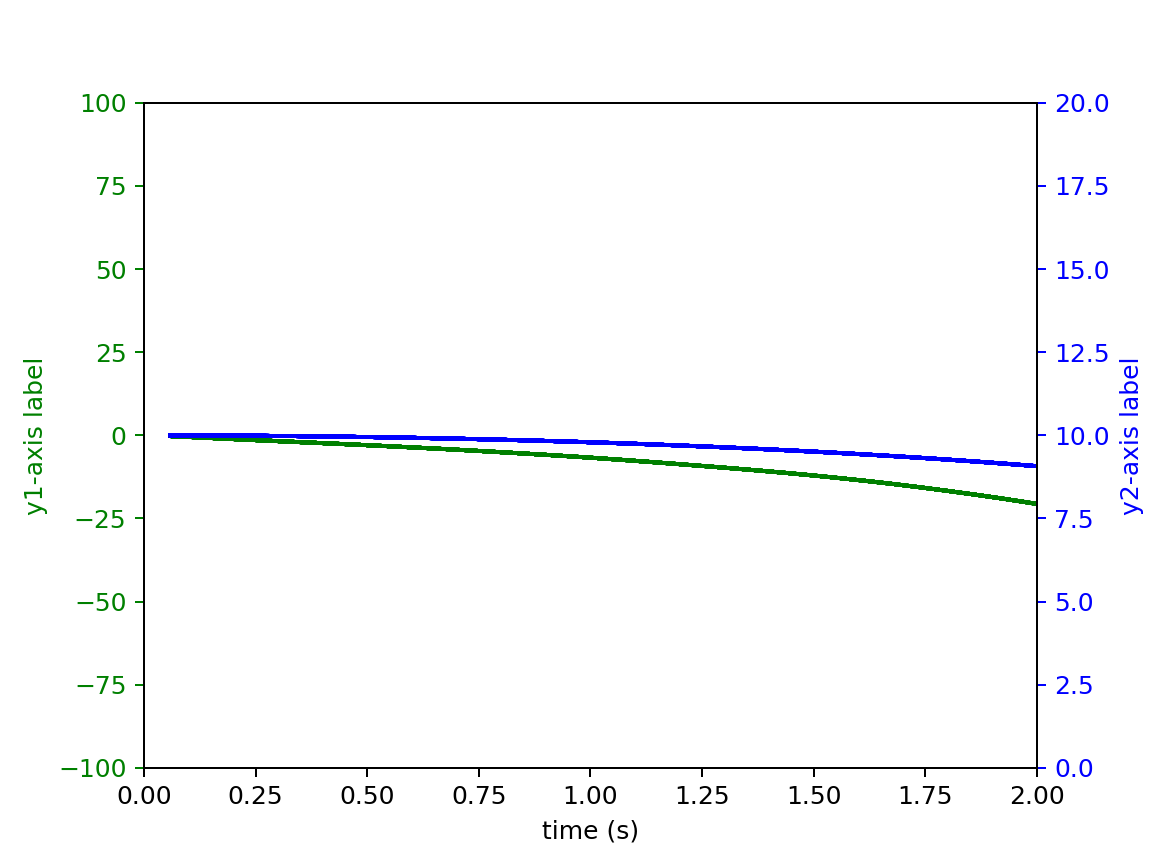

Episode =  120, total reward = -3998.552
Episode =  121, total reward = -2505.310
Episode =  122, total reward = -3043.609
Episode =  123, total reward = -2217.541
Episode =  124, total reward = -3856.507
Episode =  125, total reward = -2991.554
Episode =  126, total reward = -2984.475
Episode =  127, total reward = -4342.074
Episode =  128, total reward = -2900.167
Episode =  129, total reward = -3220.692
Episode =  130, total reward = -2704.912
Episode =  131, total reward = -2165.391
Episode =  132, total reward = -4198.182
Episode =  133, total reward = -1835.902
Episode =  134, total reward = -3591.005
Episode =  135, total reward = -3145.709
Episode =  136, total reward = -3259.108
Episode =  137, total reward = -3802.132
Episode =  138, total reward = -3599.787
Episode =  139, total reward = -1832.057


<IPython.core.display.Javascript object>


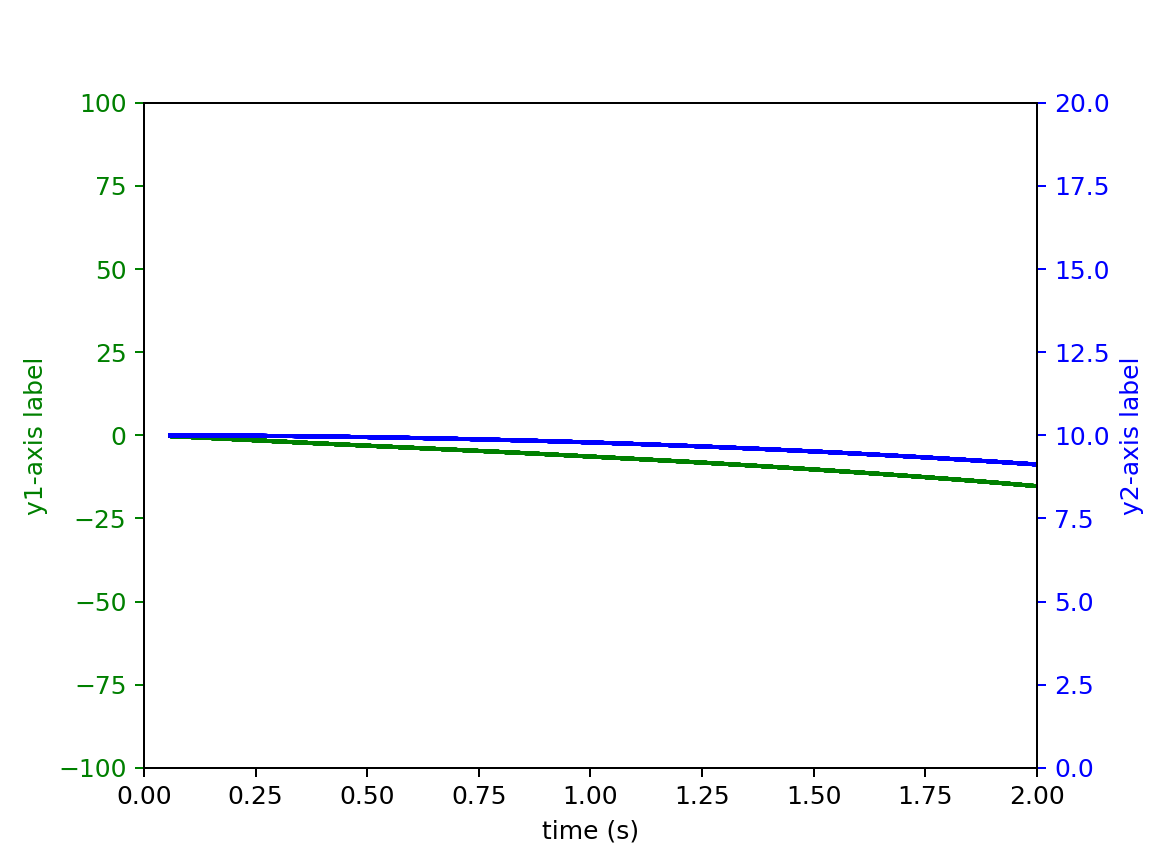

Episode =  140, total reward = -2971.480
Episode =  141, total reward = -2814.869
Episode =  142, total reward = -2011.498
Episode =  143, total reward = -2262.637
Episode =  144, total reward = -3406.724
Episode =  145, total reward = -2439.324
Episode =  146, total reward = -3021.103
Episode =  147, total reward = -2018.509
Episode =  148, total reward = -2348.868
Episode =  149, total reward = -3991.784
Episode =  150, total reward = -3857.393
Episode =  151, total reward = -2113.552
Episode =  152, total reward = -3659.665
Episode =  153, total reward = -4380.135
Episode =  154, total reward = -1900.031
Episode =  155, total reward = -3641.108
Episode =  156, total reward = -1749.960
Episode =  157, total reward = -3042.623
Episode =  158, total reward = -3289.996
Episode =  159, total reward = -3461.426


<IPython.core.display.Javascript object>


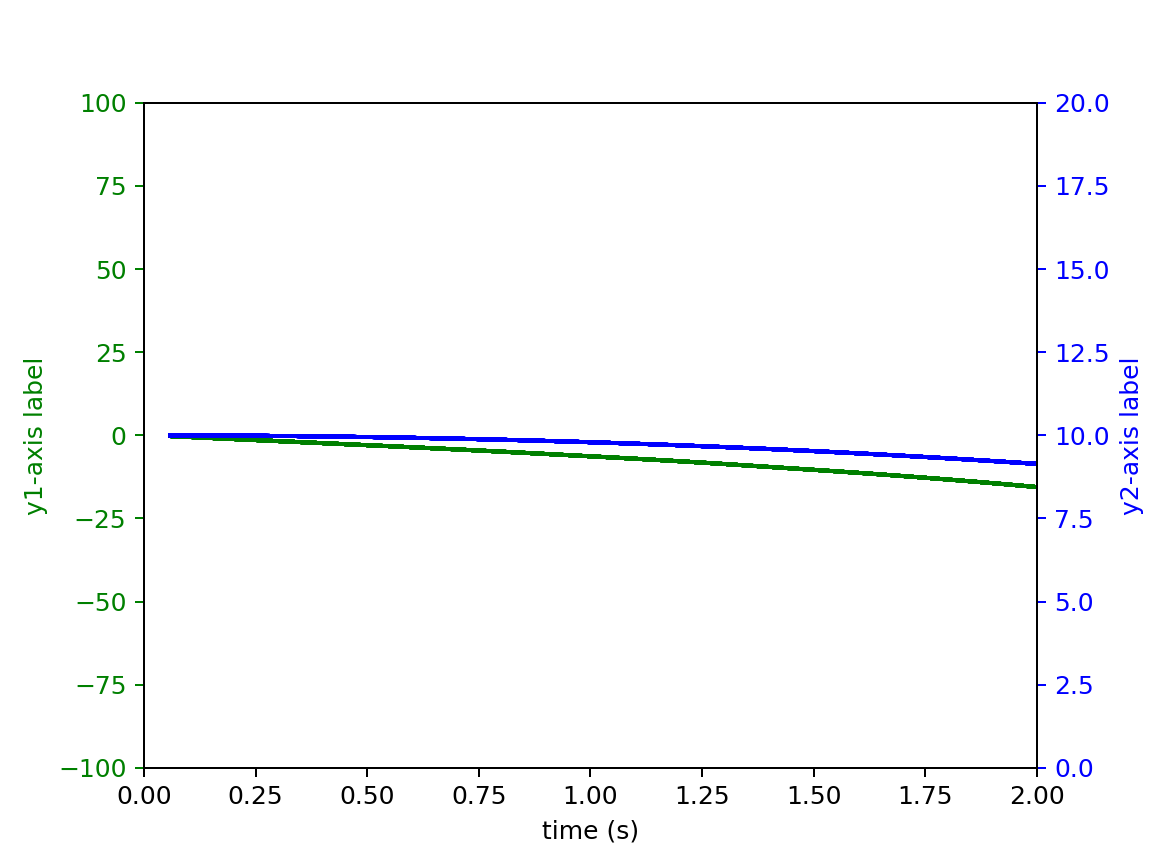

Episode =  160, total reward = -3123.521
Episode =  161, total reward = -3143.257
Episode =  162, total reward = -3607.368
Episode =  163, total reward = -4137.375
Episode =  164, total reward = -3016.782
Episode =  165, total reward = -1609.771
Episode =  166, total reward = -4021.490
Episode =  167, total reward = -2182.753
Episode =  168, total reward = -2190.976
Episode =  169, total reward = -2012.824
Episode =  170, total reward = -2551.557
Episode =  171, total reward = -3329.722
Episode =  172, total reward = -4202.101
Episode =  173, total reward = -2942.890
Episode =  174, total reward = -4535.517
Episode =  175, total reward = -2480.839
Episode =  176, total reward = -2400.706
Episode =  177, total reward = -3598.913
Episode =  178, total reward = -4352.969
Episode =  179, total reward = -3326.973


<IPython.core.display.Javascript object>


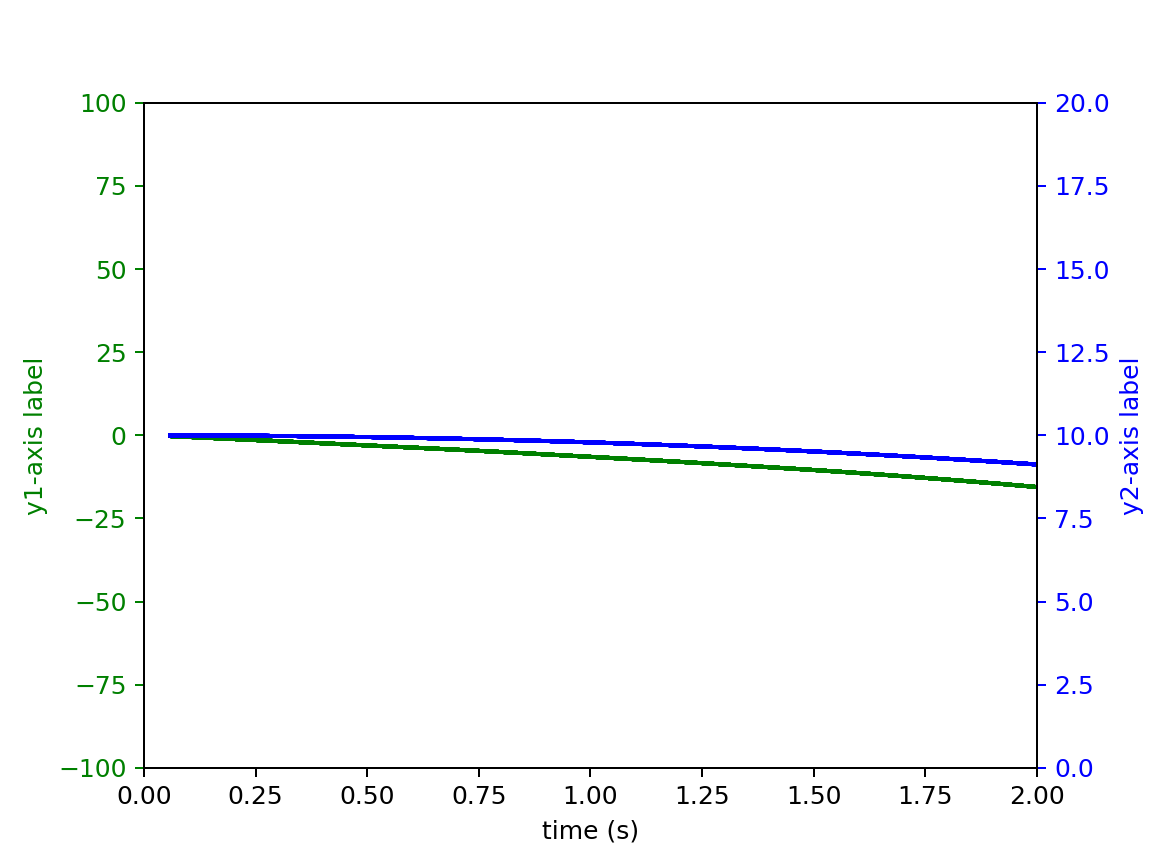

Episode =  180, total reward = -2659.843
Episode =  181, total reward = -2719.118
Episode =  182, total reward = -2737.494
Episode =  183, total reward = -2314.204
Episode =  184, total reward = -1713.184
Episode =  185, total reward = -2192.961
Episode =  186, total reward = -2078.703
Episode =  187, total reward = -3025.938
Episode =  188, total reward = -4379.445
Episode =  189, total reward = -1807.765
Episode =  190, total reward = -4108.966
Episode =  191, total reward = -3247.279
Episode =  192, total reward = -3075.076
Episode =  193, total reward = -2553.580
Episode =  194, total reward = -3271.543
Episode =  195, total reward = -3630.530
Episode =  196, total reward = -3080.722
Episode =  197, total reward = -3117.363
Episode =  198, total reward = -2274.352
Episode =  199, total reward = -1835.276


<IPython.core.display.Javascript object>


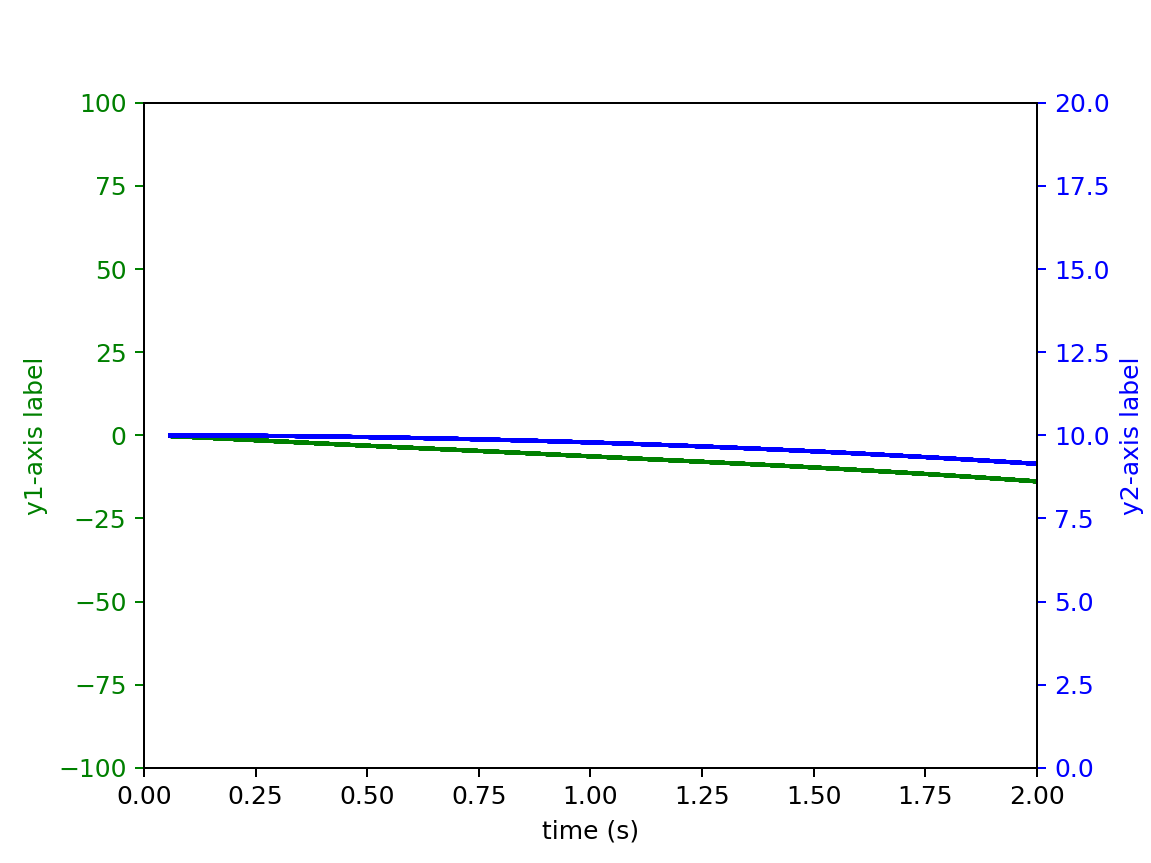

Episode =  200, total reward = -3077.632
Episode =  201, total reward = -3606.748
Episode =  202, total reward = -2602.905
Episode =  203, total reward = -2074.075
Episode =  204, total reward = -2991.149
Episode =  205, total reward = -3827.119
Episode =  206, total reward = -3292.612
Episode =  207, total reward = -2170.020
Episode =  208, total reward = -3533.383
Episode =  209, total reward = -3360.437
Episode =  210, total reward = -3581.575
Episode =  211, total reward = -4396.548
Episode =  212, total reward = -1872.559
Episode =  213, total reward = -3280.598
Episode =  214, total reward = -3873.556
Episode =  215, total reward = -2956.004
Episode =  216, total reward = -2087.726
Episode =  217, total reward = -3507.829
Episode =  218, total reward = -4160.076
Episode =  219, total reward = -2774.466


<IPython.core.display.Javascript object>


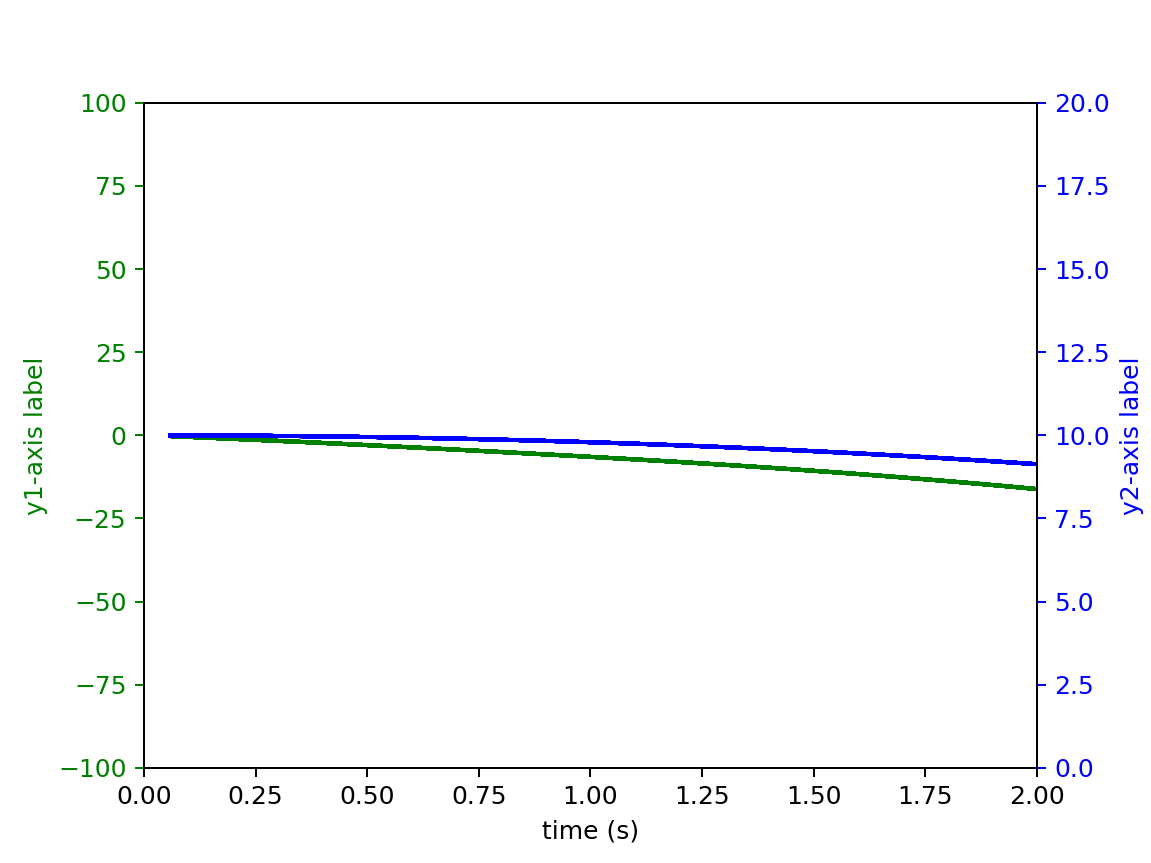

Episode =  220, total reward = -2975.391
Episode =  221, total reward = -2395.809
Episode =  222, total reward = -3721.972
Episode =  223, total reward = -3471.739
Episode =  224, total reward = -3150.525
Episode =  225, total reward = -1929.688
Episode =  226, total reward = -2566.769
Episode =  227, total reward = -3037.690
Episode =  228, total reward = -4337.412
Episode =  229, total reward = -3719.533
Episode =  230, total reward = -3445.196
Episode =  231, total reward = -1640.519
Episode =  232, total reward = -2191.557
Episode =  233, total reward = -2962.925
Episode =  234, total reward = -3109.163
Episode =  235, total reward = -3156.229
Episode =  236, total reward = -2732.793
Episode =  237, total reward = -3002.281
Episode =  238, total reward = -3306.660
Episode =  239, total reward = -2568.114


<IPython.core.display.Javascript object>


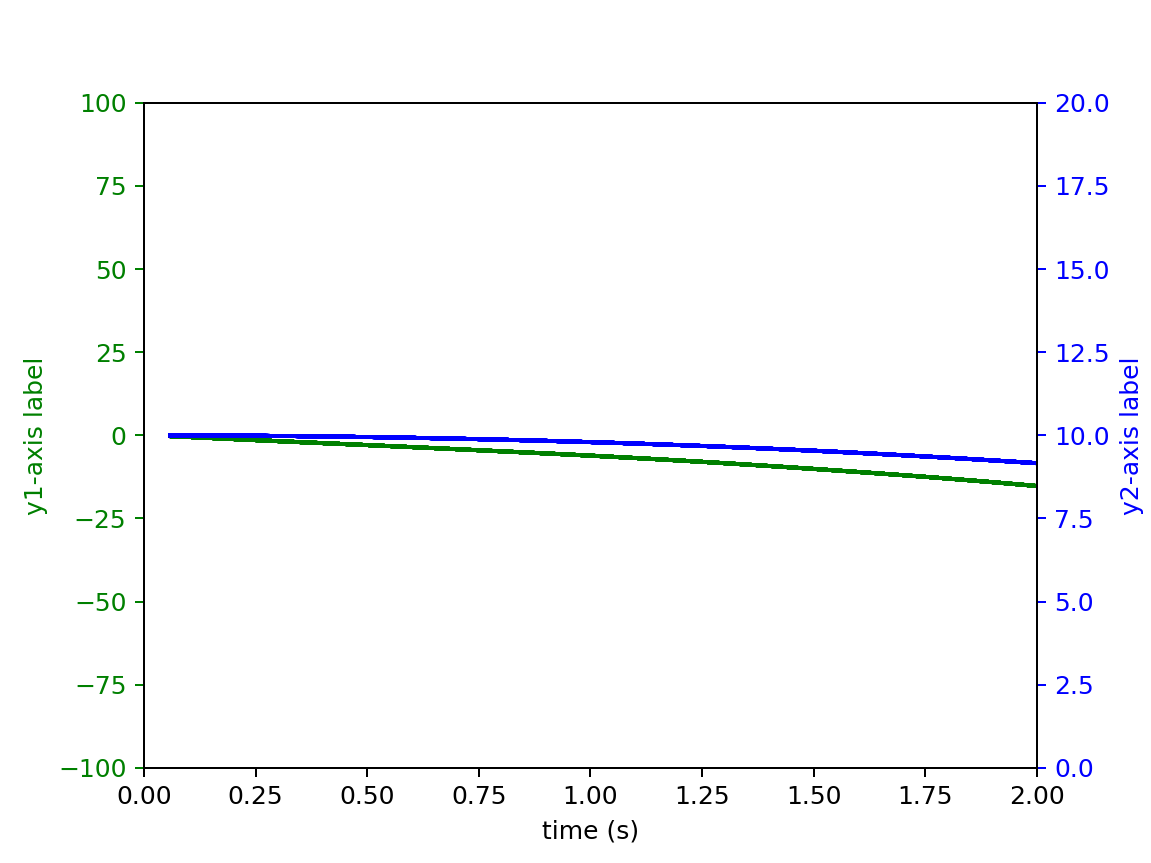

Episode =  240, total reward = -2496.255
Episode =  241, total reward = -1772.361
Episode =  242, total reward = -2614.785
Episode =  243, total reward = -4847.155
Episode =  244, total reward = -3159.088
Episode =  245, total reward = -3988.973
Episode =  246, total reward = -4255.168
Episode =  247, total reward = -1795.851
Episode =  248, total reward = -3192.386
Episode =  249, total reward = -4134.223
Episode =  250, total reward = -2762.645
Episode =  251, total reward = -2731.122
Episode =  252, total reward = -3672.594
Episode =  253, total reward = -3638.571
Episode =  254, total reward = -2762.374
Episode =  255, total reward = -2681.909
Episode =  256, total reward = -2732.188
Episode =  257, total reward = -2571.257
Episode =  258, total reward = -2766.680
Episode =  259, total reward = -2631.467


<IPython.core.display.Javascript object>


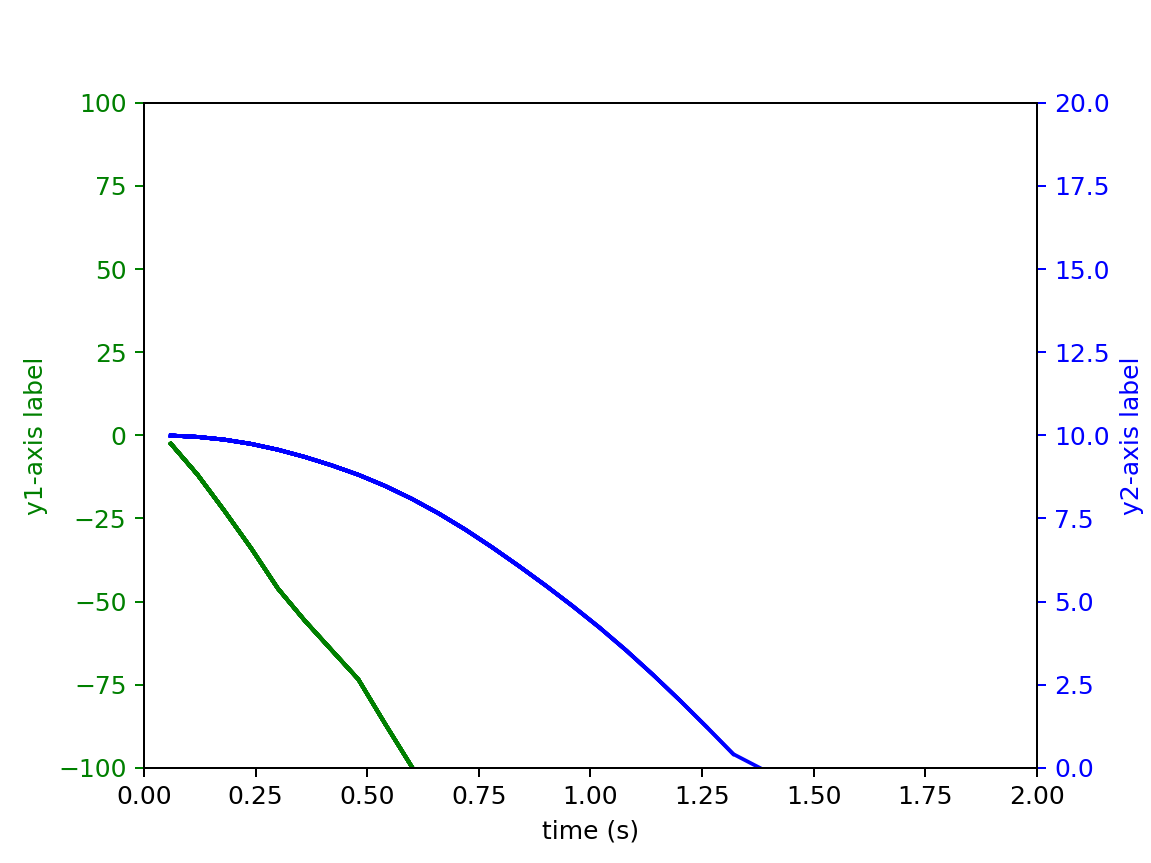

Episode =  260, total reward = -2656.862
Episode =  261, total reward = -2624.079
Episode =  262, total reward = -2578.299
Episode =  263, total reward = -2650.487
Episode =  264, total reward = -2625.067
Episode =  265, total reward = -2667.766
Episode =  266, total reward = -2589.862
Episode =  267, total reward = -2569.895
Episode =  268, total reward = -2598.756
Episode =  269, total reward = -2765.906
Episode =  270, total reward = -2647.600
Episode =  271, total reward = -2566.832
Episode =  272, total reward = -2666.532
Episode =  273, total reward = -2707.357
Episode =  274, total reward = -2643.703
Episode =  275, total reward = -2706.954
Episode =  276, total reward = -2589.818
Episode =  277, total reward = -2605.256
Episode =  278, total reward = -2556.022
Episode =  279, total reward = -2740.755


<IPython.core.display.Javascript object>


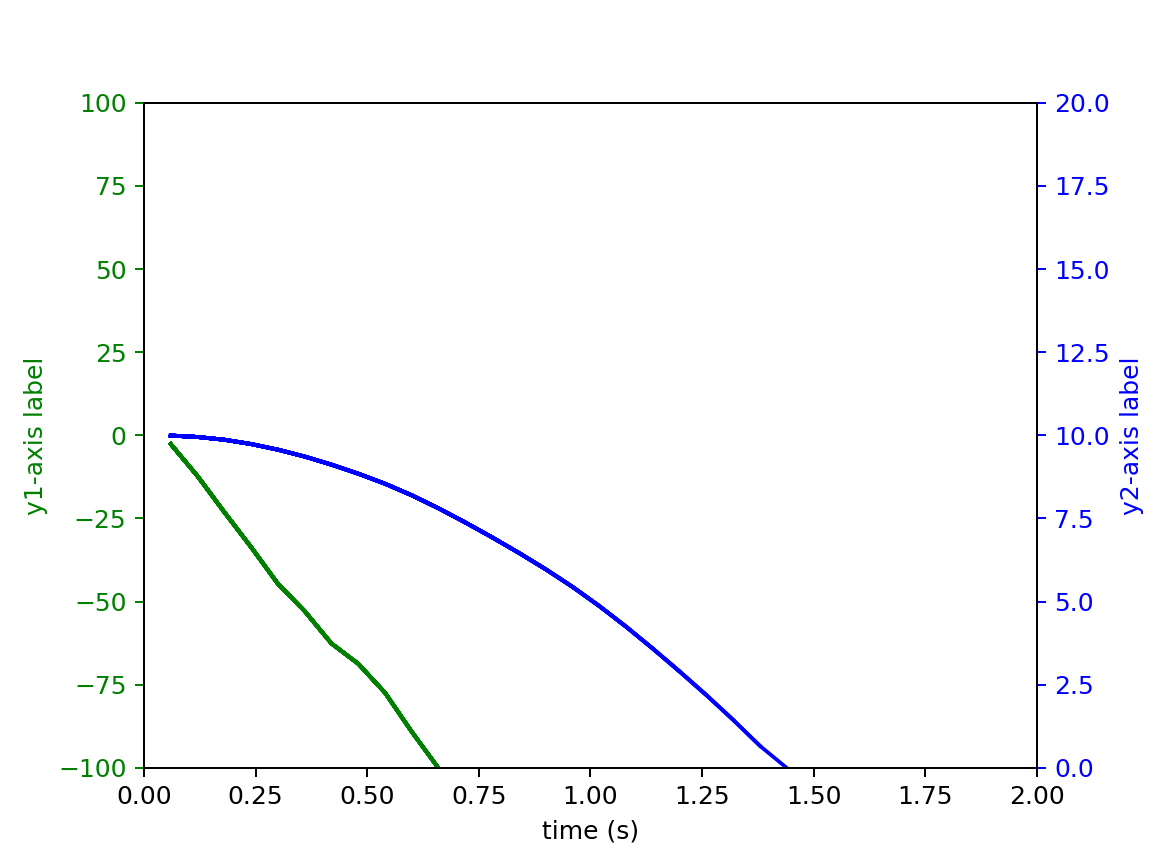

Episode =  280, total reward = -2609.040
Episode =  281, total reward = -2616.868
Episode =  282, total reward = -2622.102
Episode =  283, total reward = -2677.908
Episode =  284, total reward = -2759.604
Episode =  285, total reward = -2629.903
Episode =  286, total reward = -2586.944
Episode =  287, total reward = -2575.852
Episode =  288, total reward = -2747.629
Episode =  289, total reward = -2639.981
Episode =  290, total reward = -2772.078
Episode =  291, total reward = -2703.231
Episode =  292, total reward = -2667.195
Episode =  293, total reward = -2689.096
Episode =  294, total reward = -2572.805
Episode =  295, total reward = -2749.309
Episode =  296, total reward = -2573.682
Episode =  297, total reward = -2761.658
Episode =  298, total reward = -2586.484
Episode =  299, total reward = -2692.108


<IPython.core.display.Javascript object>


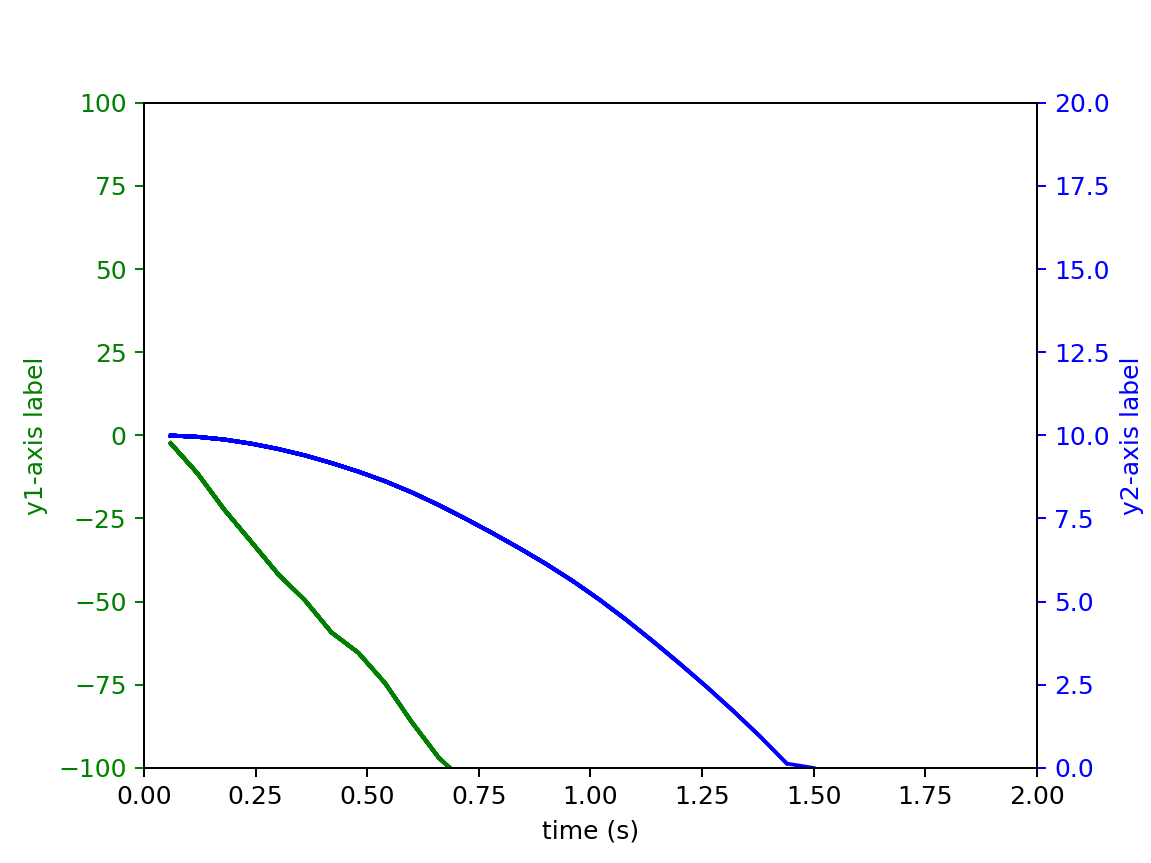

Episode =  300, total reward = -2756.505


In [2]:
# you must include '%matplotlib notebook' for this to work
%matplotlib notebook

import sys
import numpy as np
import pandas as pd
from agents.agent import DDPG
from task import Task

num_episodes = 300
init_pose = [0., 0., 10., 0., 0., 0.]
init_velocities = [0., 0., 0.]
init_angle_velocities = [0., 0., 0.]
target_pos = np.array([0., 0., 20.])
task = Task(init_pose=init_pose, init_velocities=init_velocities,
            init_angle_velocities=init_angle_velocities,target_pos=target_pos)
agent = DDPG(task) 

total_rewards = []

display_freq = 20
display_step_freq = 10

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    
    display_graph = i_episode % display_freq == 0
    if display_graph:
        # prior to the start of each episode, clear the datapoints
        x, y1, y2 = [], [], []    
        fig, sub1, sub2 = plt_init()

    total_reward = 0
    step = 0
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_reward += reward
        step += 1
        # within the episode loop
        if display_graph:
            x.append(task.sim.time) # time
            y1.append(reward) # y-axis 1 values
            y2.append(task.sim.pose[2]) # y-axis 2 values
            
            #if step % display_step_freq == 0:
            plt_dynamic(fig, sub1, sub2, x, y1, y2)
        if done:
            print("\rEpisode = {:4d}, total reward = {:7.3f}".format(
                i_episode, total_reward))  # [debug]
            total_rewards.append(total_reward)
            break


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

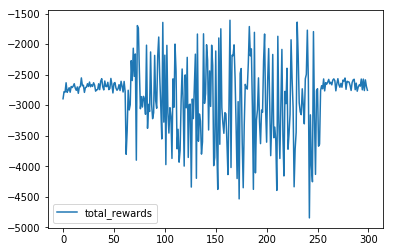

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(total_rewards)),  total_rewards, label='total_rewards')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: